In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go

#read the csv file
Bank_Campaign = pd.read_csv('src/resources/data.csv', delimiter = ';')

#plotting the boxplot to check for the outliers
tra = go.Box(y = Bank_Campaign['balance'], name = 'Balance')
layout = go.Layout(title = 'Boxplot of Average yearly Balance')
f = go.Figure(data = [tra], layout = layout)
f.show()

#remove the outliers
m_bal = np.mean(Bank_Campaign['balance'])
st_bal = np.std(Bank_Campaign['balance'])

thresh = 3 * st_bal
outliers = Bank_Campaign[(Bank_Campaign['balance'] > m_bal + thresh) | (Bank_Campaign['balance'] < m_bal - thresh)]
data = Bank_Campaign.drop(outliers.index)

#Boxplot of the number of contacts performed for the client during the campaign based on 
#the outcome of the previous marketing campaign
data.drop(data.loc[data['previous'] == 275].index, inplace = True)
fig5 = px.box(data, x = 'poutcome', y = 'previous', color = 'poutcome')
fig5.show()

#handling the unknown cases and education statuses based on the basic know hows
data.loc[(data['age'] > 60) & (data['job'] == 'unknown'), 'job'] = 'retired'
data.loc[(data['education'] == 'unknown') & (data['job'] == 'management'), 'education'] = 'tertiary'

#adding a new feature called the public holiday feature to observe if that has any significant impact
public_holidays = {
    'jan-01' : "New Year's Eve",
    'feb-21' : "Shorve Tuesday",
    'mar-19' : "Father's Day",
    'mar-20' : "Spring Equinox",
    'mar-25' : "Daylight Saving Start",
    'apr-06' : "Good Friday",
    'apr-08' : "Easter",
    'apr-25' : "Freedom Day",
    'may-01' : "Labor Day",
    'may-06' : "Mother's Day",
    'jun-10' : "Portugal Day",
    'jun-20' : "Summer Solstice",
    'jul-26' : "Grandparent's Day",
    'aug-15' : "Assumption",
    'sep-22' : "Autumnal Equinox",
    'oct-28' : "Daylight Saving End",
    'dec-08' : "Immaculate Conception",
    'dec-21' : "Winter Solstice",
    'dec-24' : "Christmas Eve",
    'dec-25' : "Christmas Day",
    'dec-31' : "New Year's Eve"
}

data['Public Holiday'] = data.apply(lambda row: 'yes' if f"{row['month']}-{row['day']}" in public_holidays else 'no', axis=1)


In [9]:
pip install --upgrade nbformat

469.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [2]:
#plotting a bargraph for the total number of clients with respect to their job title
counts = data['job'].value_counts().reset_index(name = 'count').rename(columns = {'index':'job'})
fig = px.bar(counts, x = 'job', y = 'count', color_discrete_sequence = px.colors.qualitative.Pastel, 
             title = 'Total number of clients with respect to their job titles')
fig.show()

In [3]:
#Based on the public holidays checking if there are any insights we can gather regarding the clients subscription rate
#plotting the bar graph for the public holidays
counts = data['Public Holiday'].value_counts().reset_index(name = 'count').rename(columns = {'index':'holidays'})
print(counts) #the table
#The bar plot of the public holidays
fig = px.bar(counts, x = 'holidays', y = 'count', color_discrete_sequence = px.colors.qualitative.Pastel, 
             title = 'Public Holiday feature distribution')
fig.show()

#based on the marketing campaigns performed on the 
holiday_campaign = data.loc[data['Public Holiday'] == 'yes']
camp = holiday_campaign['y'].value_counts().reset_index(name = 'count').rename(columns = {'index':'Subscription_on_Public_Holidays'})
plt = px.bar(camp, x = 'Subscription_on_Public_Holidays', y = 'count', color_discrete_sequence = px.colors.qualitative.Pastel,
            title = 'Subscription on public holidays')
plt.show()

  holidays  count
0       no  43769
1      yes    696


In [4]:
#To check if there is any correlation between the age and balance 
#scatter plot of age vs balance
fig1 = px.scatter(data, x = 'age', y = 'balance', color = 'y', trendline = 'ols', symbol = 'y')

fig1.update_layout(
    title = "Scatter plot of bank term subscriptions based on age and balance",
    xaxis_title = 'Age',
    yaxis_title = 'Balance'
)
fig1.show()

In [5]:
#Bar plot for the subscription rates based on the education level
sub1 = data.groupby(['education','y'])['y'].count().unstack()

tr1 = go.Bar(x = sub1.index.tolist(), y = sub1['no'], name = 'Not Subscribed')
tr2 = go.Bar(x = sub1.index.tolist(), y = sub1['yes'], name = 'Subscribed')

da = [tr1, tr2]
l = go.Layout(barmode = 'stack', title = 'Status of the Subscription based on Education Level',
             xaxis = dict(title = 'Education Level', tickmode = 'array', tickvals = sub1.index.tolist(), ticktext = sub1.index.tolist()))
fig2 = go.Figure(data = da, layout = l)
fig2.show()

In [6]:
#plotting histogram to find the typical age group being targeted by the bank campaigns
tr = go.Histogram(x = data['age'])
layout = go.Layout(title = 'Histogram Plot of age distribution of the clients', xaxis = dict(title = 'Age distribution'), yaxis = dict(title = 'Total number of clients'))
fig4 = go.Figure(data = [tr], layout = layout)
fig4.show()



In [7]:
df = data.query('default == "yes"')
fig5 = px.box(df, x = 'job', y = 'balance', color = 'job', title = 'Average yearly balance vs the job title of clients')
fig5.show()

In [9]:
#summary statistics separately for numerical and categorical data

num = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
num_sum = data[num].describe().T


cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
cat_sum = pd.DataFrame(columns=['Count', 'Unique', 'Top', 'Frequency'])
for feature in cat_col:
    unique_vals = data[feature].unique()
    count = len(data[feature])
    unique = len(unique_vals)
    top = data[feature].mode()[0]
    freq = data[feature].value_counts()[top]
    cat_sum.loc[feature] = [count, unique, top, freq]


# Create table for numeric summary statistics
num_tab = num_sum[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
num_tab = num_tab.rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Standard Deviation',
                                              'min': 'Minimum', '25%': '25th Percentile', '50%': 'Median',
                                              '75%': '75th Percentile', 'max': 'Maximum'})
num_tab.index.name = 'Numeric Variable'
print(num_tab)


                    Count         Mean  Standard Deviation  Minimum  \
Numeric Variable                                                      
age               44465.0    40.882402           10.596258     18.0   
balance           44465.0  1084.556663         1721.086708  -6847.0   
duration          44465.0   258.055617          257.442190      0.0   
campaign          44465.0     2.765523            3.100494      1.0   
pdays             44465.0    40.239627          100.263656     -1.0   
previous          44465.0     0.573372            1.908715      0.0   

                  25th Percentile  Median  75th Percentile  Maximum  
Numeric Variable                                                     
age                          33.0    39.0             48.0     95.0  
balance                      68.0   431.0           1347.0  10483.0  
duration                    103.0   180.0            319.0   4918.0  
campaign                      1.0     2.0              3.0     63.0  
pdays      

In [10]:
print(cat_sum)


           Count  Unique          Top  Frequency
job        44465      12  blue-collar       9647
marital    44465       3      married      26728
education  44465       4    secondary      22936
default    44465       2           no      43652
housing    44465       2          yes      24816
loan       44465       2           no      37260
contact    44465       3     cellular      28777
month      44465      12          may      13628
poutcome   44465       4      unknown      36362
y          44465       2           no      39297


In [21]:
#Getting necessary modules and classes ready
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

#Split the data into input and target features
X = data.drop(['y'], axis = 1)
y = data['y']

#performing feature engineering on the input and target features
#creating dummy variables for the target feature
l = LabelEncoder()
y = l.fit_transform(data['y'])
#One hot encoding the categorical attributes of the input features
cat_cols = ['job', 'marital', 'education', 'default', 
        'housing', 'loan', 'contact', 'month', 'poutcome', 'Public Holiday']
preprocessor = ColumnTransformer(
    transformers =[('cat', OneHotEncoder(),cat_cols)],
    remainder = 'passthrough'
)

#Splitting the input and target features into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  
#Defining a function for the consfusion matrix
def Confusion_Matrix(y_tst, y_estimates):
    cm = confusion_matrix(y_tst, y_estimates)
    sns.heatmap(cm, annot=True, cmap="Reds", fmt = 'd')
    pl.title('Confusion Matrix')
    pl.xlabel('Predicted')
    pl.ylabel('Actual')
    pl.show()

#defining the functions for the Receiver operating characteristic curve
def ROC_Curve(y_tst, y_pred):
    fpr, tpr, thresholds = roc_curve(y_tst, y_pred)
    roc_dec = roc_auc_score(y_tst, y_pred)
    pl.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)'%roc_dec)
    pl.plot([0,1], [0,1], 'k--')
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('ROC Curve')
    pl.legend(loc = 'lower right')
    pl.show()

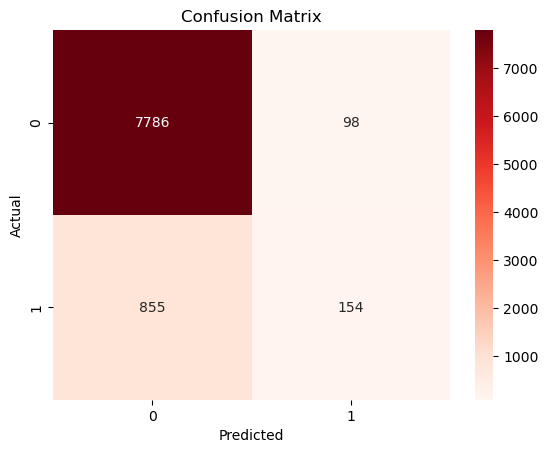

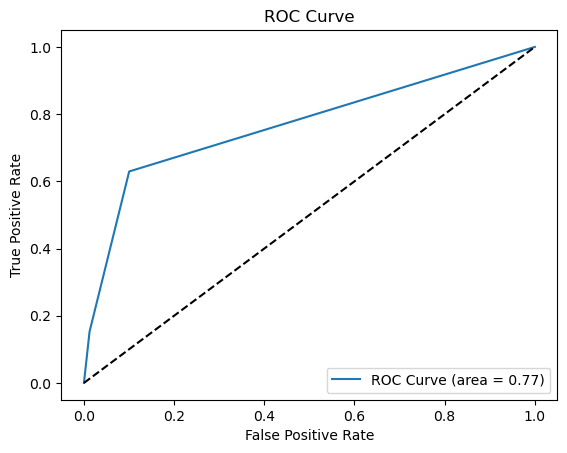

training accuracy of the model: 0.8892
test accuracy of the model: 0.8928
Classification report of the decision tree model: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7884
           1       0.61      0.15      0.24      1009

    accuracy                           0.89      8893
   macro avg       0.76      0.57      0.59      8893
weighted avg       0.87      0.89      0.86      8893



In [22]:
#Performing decision tree on the data to predict the term subscription through the campaigns
#of bank
#Defining a function for decision tree
def Decision_tree_model(X_train, X_test, y_train, y_test):
    
    #Defining the pipeline with preprocessor and decision tree classifier as stages
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(ccp_alpha = 0.01))
    ])
    
    #Fitting the Pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    #Getting the train and test score
    tr_sc = pipeline.score(X_train, y_train)
    tst_sc = pipeline.score(X_test, y_test)
    
    #Getting the classification report
    Y_predictions = pipeline.predict(X_test)
    Clas_report = classification_report(y_test, Y_predictions)
    
    #calling the function to plot the confusion matrix graph
    Confusion_Matrix(y_test, Y_predictions)
    
    #predicted estimates of the probabilities
    y_pred = pipeline.predict_proba(X_test)[:,1]
    
    #Plotting the ROC curve based on the above estimates by calling the defined ROC_Cruve function
    ROC_Curve(y_test, y_pred)
    
    #return the important variables from the function
    return tr_sc, tst_sc, Clas_report

train_score, test_score, Clasification_report = Decision_tree_model(X_train, X_test, y_train, y_test)
print("training accuracy of the model: {:.4f}".format(train_score))
print("test accuracy of the model: {:.4f}".format(test_score))
print("Classification report of the decision tree model: \n{}".format(Clasification_report))

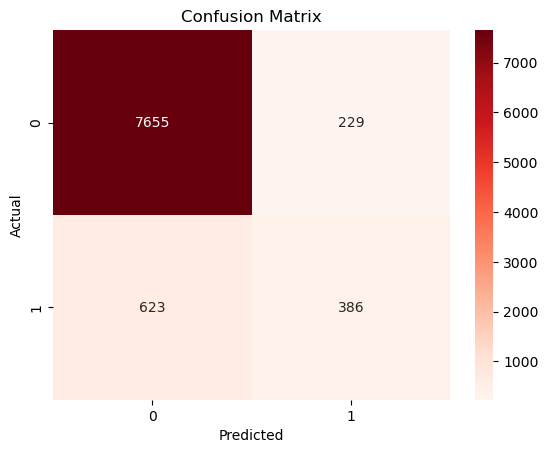

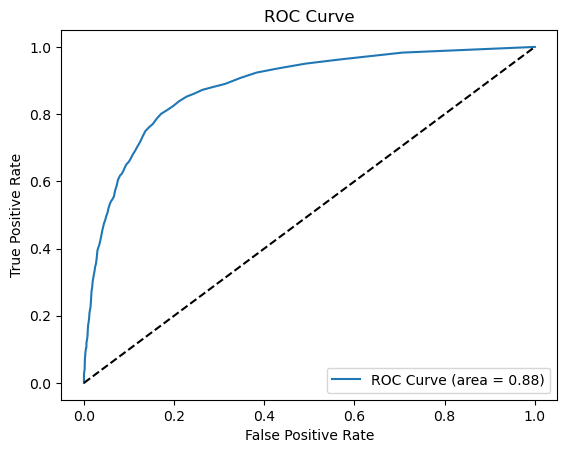

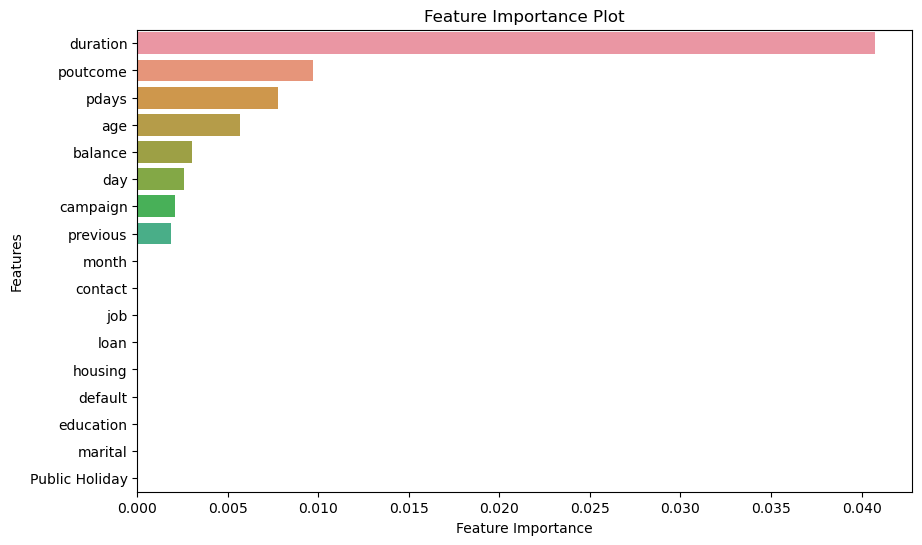

None
The train accuracy of the random forest model: 0.9999
The test accuracy of the random forest model: 0.9042
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7884
           1       0.63      0.38      0.48      1009

    accuracy                           0.90      8893
   macro avg       0.78      0.68      0.71      8893
weighted avg       0.89      0.90      0.89      8893



In [26]:
#Performing RANDOM FOREST model on the marketing campaign datasets
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

#building the model

def Random_forest(X_train, X_test, y_train, y_test):

    #creating an object pipeline with preprcessor and classifier set accordingly
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state = 42))),
        ('classifier', RandomForestClassifier(random_state = 42))
    ])

    #Fitting the pipeline on the training datasets of input and target features
    pipeline.fit(X_train, y_train)

    #Train and test accuracies
    train_ac = pipeline.score(X_train, y_train)
    test_ac = pipeline.score(X_test, y_test)

    #Getting the estimates of predictions for the input featured test set
    Y_predictions = pipeline.predict(X_test)

    #Classification report
    clas_report = classification_report(y_test, Y_predictions)

    #Calling the confusion matrix function to show the plot
    Confusion_Matrix(y_test, Y_predictions)

    #Calling the ROC-Curve function to show the plot
    y_pred = pipeline.predict_proba(X_test)[:, 1]
    ROC_Curve(y_test, y_pred)

    #feature importance plot using permuation importance technique to assess the importance of features
    perm_imp = permutation_importance(pipeline, X_test, y_test, n_repeats = 10, random_state = 42)
    feature_imp = perm_imp.importances_mean
    feature_name = X_test.columns

    #creating a graph for the feature importance 
    feature_df = pd.DataFrame({'Features': feature_name, 'Importance':feature_imp})
    feature_df.sort_values(by='Importance', ascending=False, inplace=True)

    #Plotting the graphs
    pl.figure(figsize = (10, 6))
    sns.barplot(x = 'Importance', y = 'Features', data = feature_df)
    pl.xlabel('Feature Importance')
    pl.ylabel('Features')
    pl.title('Feature Importance Plot')
    print(pl.show())

    return train_ac, test_ac, clas_report

train_score, test_score, Class_report = Random_forest(X_train, X_test, y_train, y_test)

print("The train accuracy of the random forest model: %.4f" %train_score)
print("The test accuracy of the random forest model: %.4f"%test_score)
print("The classification report of the model: \n", Class_report)
    

    

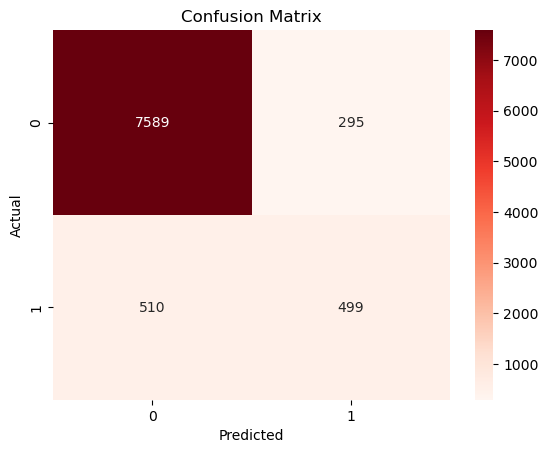

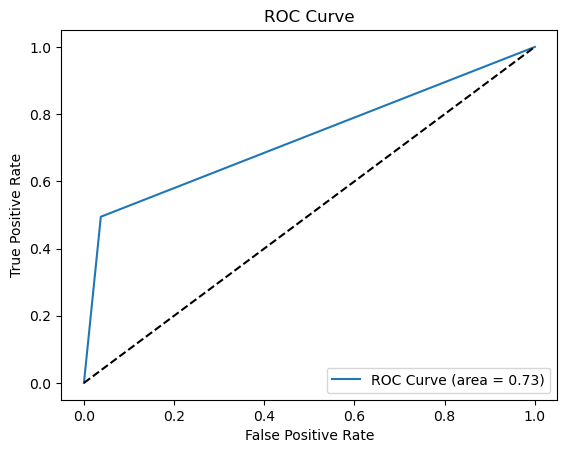

The train accuracy of the XG Boost model is: 0.9541
The test accuracy of the XG Boost model is: 0.9095
The classification report is: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7884
           1       0.63      0.49      0.55      1009

    accuracy                           0.91      8893
   macro avg       0.78      0.73      0.75      8893
weighted avg       0.90      0.91      0.90      8893



In [24]:
#Running the XGBoost 
from xgboost import XGBClassifier

def xgboost_pipeline(X_train, X_test, y_train, y_test):
    # Define the XG-Boost classifier
    pipeline = Pipeline ([
        ('preprocessor' , preprocessor),
        ('classifier', XGBClassifier()) #Using the XG-Boost classifier from the library
    ])
    
    #Fit the pipeline to training dataset
    pipeline.fit(X_train, y_train)
    
    #Make predictions on test and train data of 
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    #Calculating the accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    #Plotting the Confusion Matrix
    Confusion_Matrix(y_test, y_test_pred)
    
    #Plotting the ROC curve
    ROC_Curve(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy, classification_report(y_test, y_test_pred)

tr, tst, Clas_rep = xgboost_pipeline(X_train, X_test, y_train, y_test)
    
print("The train accuracy of the XG Boost model is: %.4f" %tr)
print("The test accuracy of the XG Boost model is: %.4f" %tst)
print("The classification report is: \n", Clas_rep)

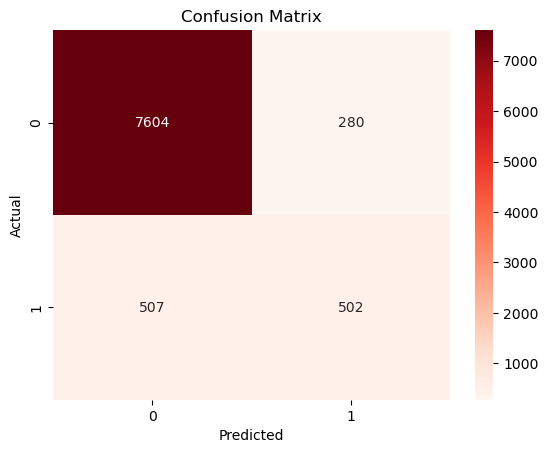

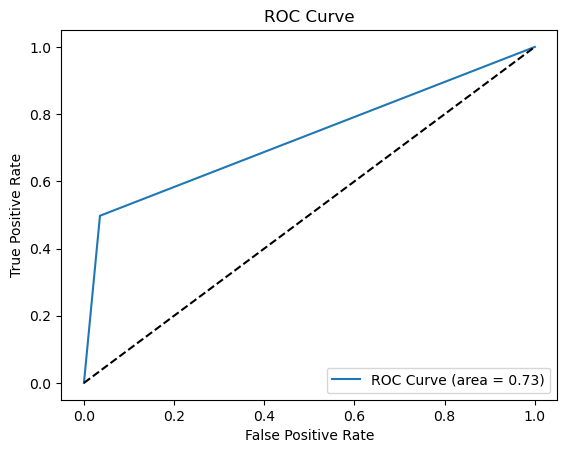

The train accuracy of the light gbm is: 0.9334
The test accuracy of the light gbm is: 0.9115
The Classification report is: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7884
           1       0.64      0.50      0.56      1009

    accuracy                           0.91      8893
   macro avg       0.79      0.73      0.76      8893
weighted avg       0.90      0.91      0.91      8893



In [29]:
import lightgbm as lgb

#creating a function to perform LightGBM
def run_Light(X_train, X_test, y_train, y_test):
    
    #defining a pipeline with preprocessor and the lightgbm module as stages
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier()) #using the LGBMClassifier from lightgbm library
    ])
    
    #fit the pipeline on the train set of response and feature datasets
    pipeline.fit(X_train, y_train)
    
    #get the prediction scores of the test and train data
    y_train_pred = pipeline.predict(X_train)
    
    y_test_pred = pipeline.predict(X_test)
    
    #Get the test and train accuracy scores
    train_ac = accuracy_score(y_train, y_train_pred)
    test_ac = accuracy_score(y_test, y_test_pred)
    
    #Getting the confusion matrix 
    Confusion_Matrix(y_test, y_test_pred)
    
    #Getting the ROC curve
    ROC_Curve(y_test, y_test_pred)
    
    return train_ac, test_ac, classification_report(y_test, y_test_pred)

tra, test, Clas_rep = run_Light(X_train, X_test, y_train, y_test)
print('The train accuracy of the light gbm is: {:.4f}' .format(tra))
print('The test accuracy of the light gbm is: {:.4f}'.format(test))
print('The Classification report is: \n', Clas_rep)

[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Unknown parameter: type
[1]	valid_0's binary_logloss: 0.336872
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.329573
[3]	valid_0's binary_logloss: 0.317426
[4]	valid_0's binary_logloss: 0.30728
[5]	valid_0's binary_logloss: 0.298619
[6]	valid_0's binary_logloss: 0.291121
[7]	valid_0's binary_logloss: 0.284288
[8]	valid_0's binary_logloss: 0.277972
[9]	valid_0's binary_logloss: 0.272328
[10]	valid_0's binary_logloss: 0.267139
[11]	valid_0's binary_logloss: 0.262366
[12]	valid_0's binary_logloss: 0.257959
[13]	valid_0's binary_logloss: 0.253992
[14]	valid_0's binary_logloss: 0.250325
[15]	valid_0's binary_logloss: 0.246971
[16]	valid_0's binary_logloss: 0.244013
[17]	valid_0's binary_logloss: 0.242285
[18]	valid_0's binary_logloss: 0.239484
[19]	valid_0's binary_logloss: 0.23688
[20]	valid_0's binary_logloss: 0.234452
[21]	valid_0's 

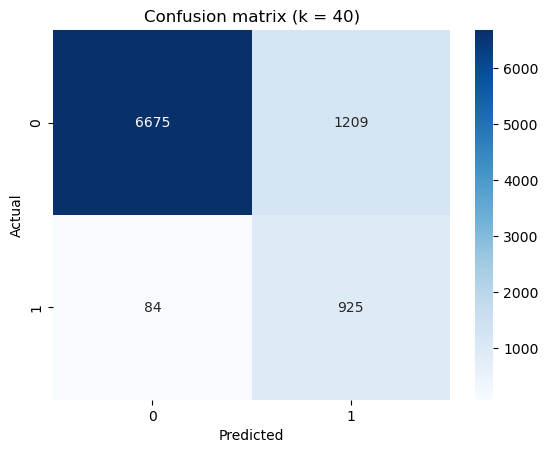

Classification report (k = 40):
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      7884
           1       0.43      0.92      0.59      1009

    accuracy                           0.85      8893
   macro avg       0.71      0.88      0.75      8893
weighted avg       0.92      0.85      0.88      8893



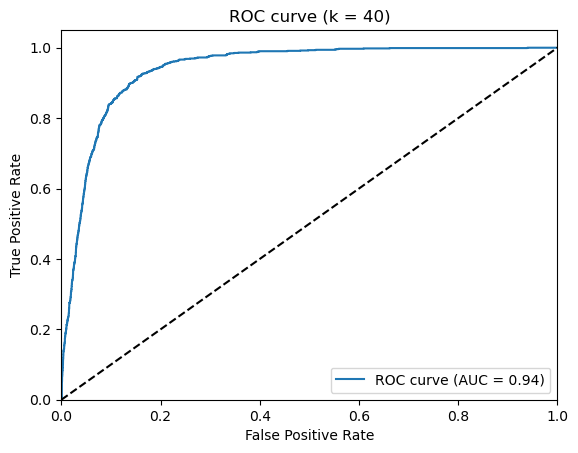

In [72]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Perform feature selection
k = 0
selector = SelectKBest(f_classif, k=k)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

# Train the model on the selected features
train_data_sel = lgbm.Dataset(X_train_sel, label=y_train)
test_data_sel = lgbm.Dataset(X_test_sel, label=y_test)
xg_sel = lgbm.train(params, train_data_sel, num_boost_round=100, valid_sets=[test_data_sel])

# Evaluate the model on selected features
y_pred_sel = xg_sel.predict(X_test_sel)
accuracy_sel = sum([1 if y >= 0.5 else 0 for y in y_pred_sel] == y_test) / len(y_test)
print("Test accuracy on selected features: ", accuracy_sel)

# Get the predicted probabilities for the test data
y_prob_sel = xg_sel.predict(X_test_sel)

#Use the best threshold for the better model
# Calculate Youden's J statistic for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob_sel)
j_scores = tpr - fpr
best_threshold_idx = np.argmax(j_scores)
best_threshold = thresholds[best_threshold_idx]
print("The best threshold calculated using Youden'J Statistics is: ", best_threshold)

# Convert the predicted probabilities to binary predictions
y_pred_sel = [1 if prob >= best_threshold else 0 for prob in y_prob_sel]

# Plot the confusion matrix
cm_sel = confusion_matrix(y_test, y_pred_sel)
sn.heatmap(cm_sel, annot=True, cmap='Blues', fmt='g')
pl.title('Confusion matrix (k = {})'.format(k))
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

# Print the classification report
cr_sel = classification_report(y_test, y_pred_sel)
print('Classification report (k = {}):\n{}'.format(k, cr_sel))

# Plot the ROC curve
fpr_sel, tpr_sel, _ = roc_curve(y_test, y_prob_sel)
roc_auc_sel = roc_auc_score(y_test, y_prob_sel)
pl.plot(fpr_sel, tpr_sel, label='ROC curve (AUC = {:.2f})'.format(roc_auc_sel))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC curve (k = {})'.format(k))
pl.legend(loc='lower right')
pl.show()

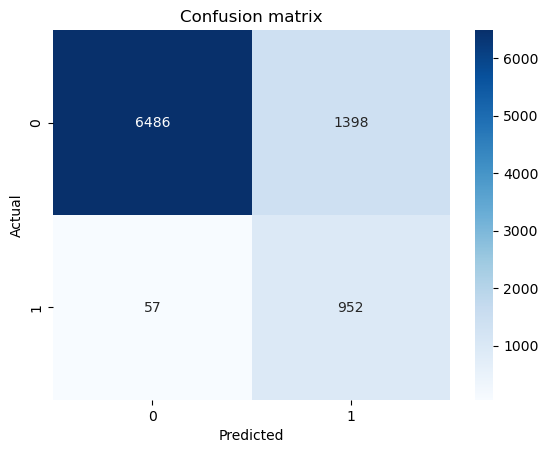

Best threshold: 0.0921
The classification report is: 
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      7884
           1       0.41      0.94      0.57      1009

    accuracy                           0.84      8893
   macro avg       0.70      0.88      0.73      8893
weighted avg       0.92      0.84      0.86      8893



In [38]:

from sklearn.metrics import precision_score, recall_score, f1_score
# calculate the Youden's J statistic for each threshold
youden_j = tprl - fprl

# find the threshold that maximizes the Youden's J statistic
best_threshold_idx = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_idx]

# use the best threshold to classify the test data and calculate performance metrics
y_pred = (y_prb >= best_threshold).astype(int)

# calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

pl.title('Confusion matrix')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()


# calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)


# print performance metrics
print("Best threshold: {:.4f}".format(best_threshold))
print("The classification report is: \n", classification_report(y_test, y_pred))

[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Unknown parameter: type
[1]	valid_0's binary_logloss: 0.668834
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.646352
[3]	valid_0's binary_logloss: 0.636615
[4]	valid_0's binary_logloss: 0.616726
[5]	valid_0's binary_logloss: 0.598285
[6]	valid_0's binary_logloss: 0.58151
[7]	valid_0's binary_logloss: 0.566374
[8]	valid_0's binary_logloss: 0.552157
[9]	valid_0's binary_logloss: 0.538944
[10]	valid_0's binary_logloss: 0.527017
[11]	valid_0's binary_logloss: 0.516327
[12]	valid_0's binary_logloss: 0.506176
[13]	valid_0's binary_logloss: 0.49595
[14]	valid_0's binary_logloss: 0.487464
[15]	valid_0's binary_logloss: 0.479287
[16]	valid_0's binary_logloss: 0.471429
[17]	valid_0's binary_logloss: 0.464507
[18]	valid_0's binary_logloss: 0.457727
[19]	valid_0's binary_logloss: 0.453963
[20]	valid_0's binary_logloss: 0.447203
[21]	valid_0's 

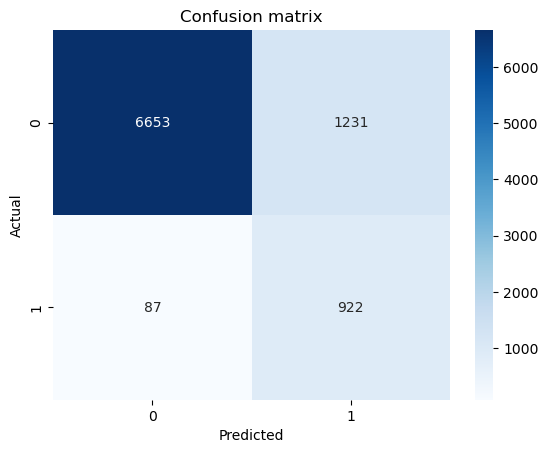

In [27]:
# perform undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

#Defining the parameters for the model
params = {
    'boosting type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose':0,
    'early_stopping_rounds': 10, 
    'force_row_wise': True,
    'lambda_l1' : 0.01
}

#creating a train dataset on the resampled data
train_data_resampled = lgbm.Dataset(X_train_resampled, label=y_train_resampled, free_raw_data = False)

#creating a train and test dataset on the features set assigning the target set as the label
train_data = lgbm.Dataset(X_train_resampled, label = y_train_resampled, free_raw_data = False)
test_data = lgbm.Dataset(X_test, label = y_test, free_raw_data = False)

xg_resampled = lgbm.train(params, train_data_resampled, num_boost_round=100, valid_sets=[test_data])

#Finding the training accuracy of the model
# Predict on the training data
y_tr = xg_resampled.predict(X_train_resampled)
y_trpr = [1 if y >= 0.5 else 0 for y in y_tr]

# Calculate train accuracy
train_accuracy = sum(y_trpr == y_train_resampled) / len(y_train_resampled)
print("Train accuracy of the model is: ", train_accuracy)

#calculating the accuracy of the model
y_prd = xg_resampled.predict(X_test)
y_prd_bin = [1 if y >= 0.5 else 0 for y in y_prd]

acrcy = sum(y_prd_bin == y_test)/len(y_test)
print("Test accuracy of the model is: ", acrcy)
print("The classification report is: \n", classification_report(y_test, y_prd_bin))

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_prd_bin)

# plot the confusion matrix as a heatmap
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

pl.title('Confusion matrix')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()


[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Unknown parameter: type
[1]	valid_0's binary_logloss: 0.668736
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.645987
[3]	valid_0's binary_logloss: 0.635676
[4]	valid_0's binary_logloss: 0.616045
[5]	valid_0's binary_logloss: 0.597654
[6]	valid_0's binary_logloss: 0.580888
[7]	valid_0's binary_logloss: 0.565731
[8]	valid_0's binary_logloss: 0.551654
[9]	valid_0's binary_logloss: 0.538766
[10]	valid_0's binary_logloss: 0.526779
[11]	valid_0's binary_logloss: 0.515827
[12]	valid_0's binary_logloss: 0.505395
[13]	valid_0's binary_logloss: 0.495087
[14]	valid_0's binary_logloss: 0.485921
[15]	valid_0's binary_logloss: 0.477274
[16]	valid_0's binary_logloss: 0.46898
[17]	valid_0's binary_logloss: 0.461882
[18]	valid_0's binary_logloss: 0.455117
[19]	valid_0's binary_logloss: 0.451144
[20]	valid_0's binary_logloss: 0.44464
[21]	valid_0's 

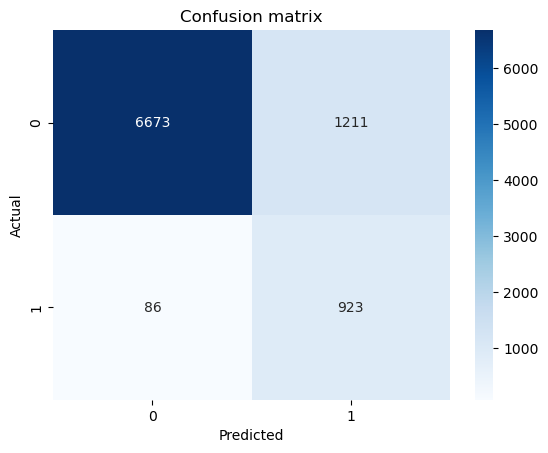

In [28]:
#light GBM with Over sampling 
# perform undersampling using RandomUnderSampler
smo = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = smo.fit_resample(X_train, y_train)

#Defining the parameters for the model
params = {
    'boosting type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose':0,
    'early_stopping_rounds': 10, 
    'force_row_wise': True,
   
}

#creating a train dataset on the resampled data
train_data_resampled = lgbm.Dataset(X_train_resampled, label=y_train_resampled, free_raw_data = False)

#creating a train and test dataset on the features set assigning the target set as the label
train_data = lgbm.Dataset(X_train_resampled, label = y_train_resampled, free_raw_data = False)
test_data = lgbm.Dataset(X_test, label = y_test, free_raw_data = False)

xg_resampled = lgbm.train(params, train_data_resampled, num_boost_round=100, valid_sets=[test_data])


#Finding the training accuracy of the model
# Predict on the training data
y_tr = xg_resampled.predict(X_train_resampled)
y_trpr = [1 if y >= 0.5 else 0 for y in y_tr]

# Calculate train accuracy
train_accuracy = sum(y_trpr == y_train_resampled) / len(y_train_resampled)
print("Train accuracy of the model is: ", train_accuracy)

#calculating the accuracy of the model
y_prd = xg_resampled.predict(X_test)
y_prd_bin = [1 if y >= 0.5 else 0 for y in y_prd]

acrcy = sum(y_prd_bin == y_test)/len(y_test)
print("Test accuracy of the model is: ", acrcy)
print("The classification report is: \n", classification_report(y_test, y_prd_bin))

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_prd_bin)

# plot the confusion matrix as a heatmap
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

pl.title('Confusion matrix')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()


Best threshold using Youden's J index:  0.55


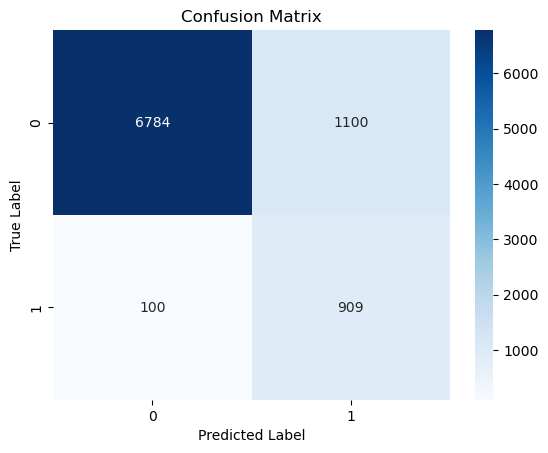

Classification Report for the best threshold in over-sampling model is: 

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7884
           1       0.45      0.90      0.60      1009

    accuracy                           0.87      8893
   macro avg       0.72      0.88      0.76      8893
weighted avg       0.92      0.87      0.88      8893



In [44]:
import numpy as np

# Get the predicted probabilities on the test set
y_pred_prob = xg_resampled.predict(X_test)

# Initialize variables for best threshold and maximum Youden's J index
best_threshold = 0
max_j_index = -1

# Loop through each threshold value between 0 and 1
for threshold in np.arange(0, 1.01, 0.01):

    # Convert probabilities to binary predictions using the threshold
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Calculate Youden's J index
    j_index = sensitivity + specificity - 1

    # Check if the current threshold has a higher J index than the current maximum
    if j_index > max_j_index:
        max_j_index = j_index
        best_threshold = threshold

# Print the best threshold and maximum J index
print("Best threshold using Youden's J index: ", best_threshold)

y_pred = (y_pred_prob >= 0.55).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

pl.title('Confusion Matrix')
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.show()

print('Classification Report for the best threshold in over-sampling model is: \n')
print(classification_report(y_test, y_pred))

0:	learn: 0.5734338	total: 8.76ms	remaining: 8.76s
100:	learn: 0.1874408	total: 530ms	remaining: 4.72s
200:	learn: 0.1708868	total: 1.06s	remaining: 4.2s
300:	learn: 0.1594467	total: 1.58s	remaining: 3.68s
400:	learn: 0.1496721	total: 2.04s	remaining: 3.04s
500:	learn: 0.1411031	total: 2.48s	remaining: 2.47s
600:	learn: 0.1339464	total: 2.98s	remaining: 1.98s
700:	learn: 0.1277731	total: 3.5s	remaining: 1.5s
800:	learn: 0.1221960	total: 4.03s	remaining: 1s
900:	learn: 0.1173061	total: 4.54s	remaining: 498ms
999:	learn: 0.1128035	total: 5.04s	remaining: 0us
0:	learn: 0.5670622	total: 5.52ms	remaining: 5.52s
100:	learn: 0.1874694	total: 504ms	remaining: 4.48s
200:	learn: 0.1719456	total: 1.01s	remaining: 4.01s
300:	learn: 0.1605845	total: 1.51s	remaining: 3.51s
400:	learn: 0.1512338	total: 2.02s	remaining: 3.02s
500:	learn: 0.1434851	total: 2.52s	remaining: 2.52s
600:	learn: 0.1373743	total: 3.03s	remaining: 2.01s
700:	learn: 0.1321534	total: 3.53s	remaining: 1.5s
800:	learn: 0.1261004	t

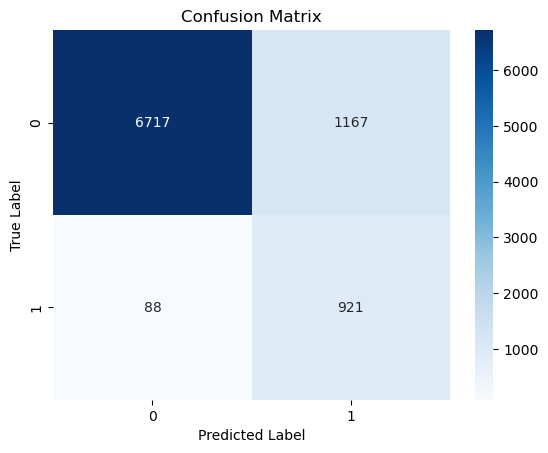

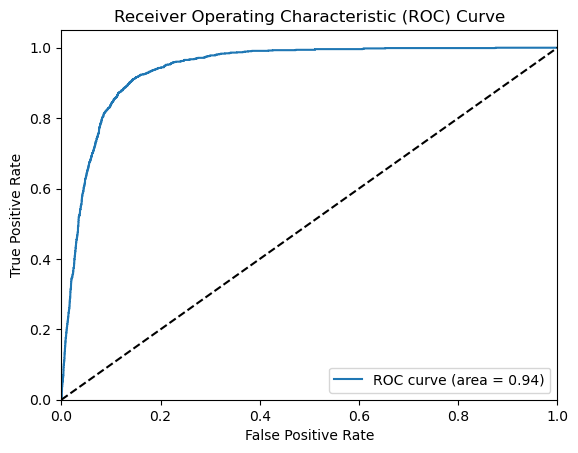

In [79]:
#Categorical Gradient Boost Method
from catboost import CatBoostClassifier


cbg = CatBoostClassifier(iterations = 1000, 
                         learning_rate = 0.1, 
                         depth = 6, random_seed = 42, 
                         verbose =100, l2_leaf_reg = 5)
cbg.fit(X_train, y_train)

# Get feature importance
feat_imp = pd.Series(cbg.get_feature_importance(), index=preprocessor.get_feature_names_out()).sort_values(ascending=False)

# Select top 30 features
top_feat = feat_imp[:30].index.tolist()

# Get the new X_train and X_test with selected features
X_train_fs = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())[top_feat]
X_test_fs = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())[top_feat]

# Fit the model with selected features
cbg_fs = CatBoostClassifier(iterations = 1000, 
                            learning_rate = 0.1, 
                            depth = 6, 
                            random_seed = 42, 
                            verbose = 100, 
                            l2_leaf_reg = 5)

cbg_fs.fit(X_train_fs, y_train)
# Get the predicted probabilities for the test set
y_pred_proba = cbg_fs.predict_proba(X_test_fs)[:,1]

# Calculate sensitivity and specificity for each threshold value
sensitivity = []
specificity = []
thresholds = np.arange(0, 1.01, 0.01)
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

# Find the threshold that maximizes the Youden's J statistic
J = np.array(sensitivity) + np.array(specificity) - 1
best_threshold = thresholds[np.argmax(J)]

# Print the best threshold
print("Best threshold using Youden's J statistic: ", best_threshold)

# Calculate test accuracy
y_pred = (y_pred_proba >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

pl.title('Confusion Matrix')
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.show()


# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

0:	learn: 0.6435919	total: 3.12ms	remaining: 3.12s
100:	learn: 0.2894168	total: 257ms	remaining: 2.29s
200:	learn: 0.2436094	total: 507ms	remaining: 2.02s
300:	learn: 0.2117869	total: 750ms	remaining: 1.74s
400:	learn: 0.1871715	total: 993ms	remaining: 1.48s
500:	learn: 0.1682356	total: 1.24s	remaining: 1.23s
600:	learn: 0.1517443	total: 1.49s	remaining: 987ms
700:	learn: 0.1358517	total: 1.73s	remaining: 738ms
800:	learn: 0.1219604	total: 1.97s	remaining: 489ms
900:	learn: 0.1108927	total: 2.21s	remaining: 243ms
999:	learn: 0.1001557	total: 2.46s	remaining: 0us
the train accuracy of the model after oversampling is: 87.81%
The test accuracy after performing oversampling is: 85.52% 
The classification of over sampled model is: 
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      7884
           1       0.43      0.91      0.59      1009

    accuracy                           0.86      8893
   macro avg       0.71      0.88      0.75 

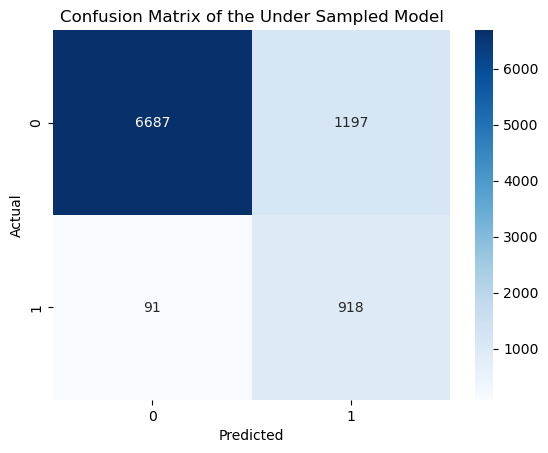

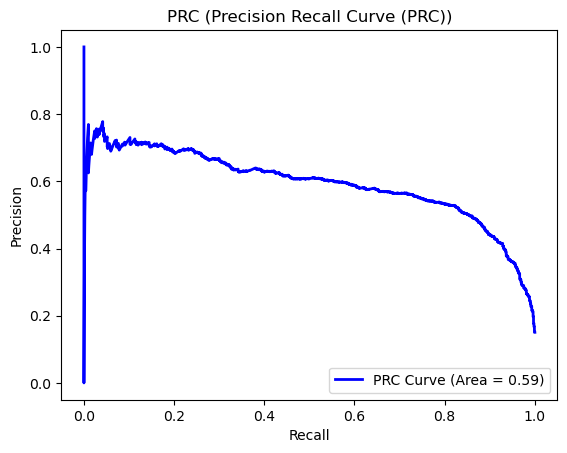

In [30]:
#Cat boost Undersampling
under = RandomUnderSampler(sampling_strategy = 'majority')
X_trainU, y_trainU = under.fit_resample(X_train, y_train)

cbg.fit(X_trainU, y_trainU)

y_predict = cbg.predict(X_test)
y_predi = cbg.predict_proba(X_test)[:, 1]

#Changing the threshold value of the prediction
y_pred = (y_predi >= 0.5).astype(int)

#Applying the predicted values to the accuracy and stuffs
print("the train accuracy of the model after oversampling is: {:.2f}%".format(cbg.score(X_train, y_train)*100))
print("The test accuracy after performing oversampling is: {:.2f}% ".format(accuracy_score(y_test,y_pred)*100))
print("The classification of over sampled model is: \n", classification_report(y_test, y_pred))

#Confusion Matrix of the undersampled model
cm_U = confusion_matrix(y_test, y_pred)

#Plotting the matrix 
sn.heatmap(cm_U, annot = True, cmap = 'Blues', fmt = 'g')
pl.title("Confusion Matrix of the Under Sampled Model")
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

#Plotting the PRC curve
pre, rec, _ = precision_recall_curve(y_test, y_predi)
pr_auc = auc(rec, pre)
pl.plot(rec, pre, color = "Blue", lw = 2, label = "PRC Curve (Area = %0.2f)" %pr_auc)
pl.xlabel("Recall")
pl.ylabel("Precision")
pl.title("PRC (Precision Recall Curve (PRC))")
pl.legend(loc = 'lower right')
pl.show()

0:	learn: 0.6371561	total: 3.09ms	remaining: 3.08s
100:	learn: 0.2872419	total: 254ms	remaining: 2.26s
200:	learn: 0.2383360	total: 496ms	remaining: 1.97s
300:	learn: 0.2049730	total: 737ms	remaining: 1.71s
400:	learn: 0.1798601	total: 983ms	remaining: 1.47s
500:	learn: 0.1599757	total: 1.23s	remaining: 1.22s
600:	learn: 0.1427813	total: 1.47s	remaining: 977ms
700:	learn: 0.1287578	total: 1.72s	remaining: 733ms
800:	learn: 0.1145995	total: 1.96s	remaining: 487ms
900:	learn: 0.1035847	total: 2.21s	remaining: 242ms
999:	learn: 0.0944159	total: 2.45s	remaining: 0us
the train accuracy of the model after oversampling is: 87.95%
The test accuracy after performing oversampling is: 85.79% 
The classification of over sampled model is: 
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      7884
           1       0.44      0.92      0.59      1009

    accuracy                           0.86      8893
   macro avg       0.71      0.88      0.75 

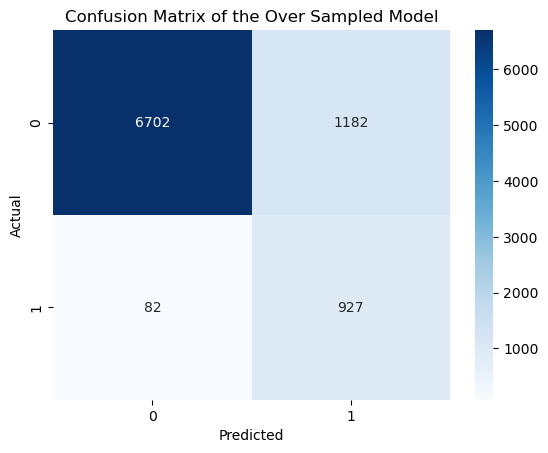

In [31]:
#Cat boost oversmapling
over = RandomOverSampler(sampling_strategy = 'minority')
X_trainO, y_trainO = under.fit_resample(X_train, y_train)

cbg.fit(X_trainO, y_trainO)

y_predi = cbg.predict(X_test)

y_pred_prob = cbg.predict_proba(X_test)[:,1]

#Changing the threshold value of the prediction test
y_predict = (y_pred_prob >= 0.5).astype(int)

#Applying the predicted values to the accuracy and stuffs
print("the train accuracy of the model after oversampling is: {:.2f}%".format(cbg.score(X_train, y_train)*100))
print("The test accuracy after performing oversampling is: {:.2f}% ".format(accuracy_score(y_test,y_predict)*100))
print("The classification of over sampled model is: \n", classification_report(y_test, y_predict))

#Confusion Matrix of the undersampled model
cm_U = confusion_matrix(y_test, y_predict)

#Plotting the matrix 
sn.heatmap(cm_U, annot = True, cmap = 'Blues', fmt = 'g')
pl.title("Confusion Matrix of the Over Sampled Model")
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

<function matplotlib.pyplot.show(close=None, block=None)>

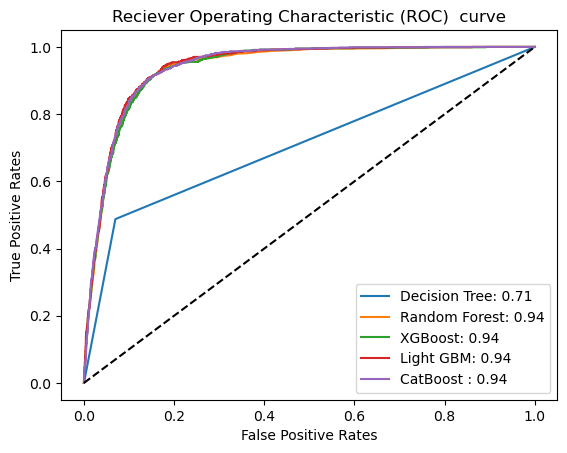

In [32]:
#comparing all the ROC curves of the selected models
pl.plot(fprd, tprd, label = "Decision Tree: %0.2f" %roc_dec)
pl.plot(fprf, tprf, label = "Random Forest: %0.2f" %roc_rf)
pl.plot(fprx, tprx, label = "XGBoost: %0.2f" %roc_xg)
pl.plot(fprl, tprl, label = "Light GBM: %0.2f" %roc_lg)
pl.plot(fprc, tprc, label = "CatBoost : %0.2f" %roc_cat)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlabel('False Positive Rates')
pl.ylabel('True Positive Rates')
pl.title('Reciever Operating Characteristic (ROC)  curve')
pl.legend(loc = 'lower right')
pl.show

In [4]:
display(data)

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

         y Public Holiday  
0       no             no  
1       no             no  
2       no             no  
3       no             no  
4       no             no  
...    ...            ...  
45206  yes             no  
45207  yes             no  
45208  yes             no  
45209   no             no  
45210   no             no  

[44465 rows x 18 columns]